# Pyber Challenge

### Loading and Reading CSV files

In [74]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
#create a rural cities dataframe 
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [6]:
#create a suburban cities dataframe 
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


## Deliverable 1: Get a Summary DataFrame 

In [7]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [8]:
# 1. Get the total rides for each city type
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

#Get the number of rides for rural cities. 
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [9]:
pyber_data_df.groupby(["type"]).count()["ride_id"]

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [10]:
# 2. Get the total drivers for each city type

# Get the number of drivers for urban cities.
urban_drivers = urban_cities_df.groupby(["city"]).sum()["driver_count"]

# get the number of drivers for suburban cities.
suburban_drivers = suburban_cities_df.groupby(["city"]).sum()["driver_count"]

#Get the number of drivers for rural cities. 
rural_drivers = rural_cities_df.groupby(["city"]).sum()["driver_count"]



In [11]:
#sum of urban cities drivers
pyber_data_df.groupby(["city"]).sum()["driver_count"]

city
Amandaburgh          216
Barajasview          572
Barronchester        176
Bethanyland          396
Bradshawfurt          70
                    ... 
West Robert         1209
West Samuelburgh    1825
Williamsonville       28
Williamsstad        1357
Williamsview         920
Name: driver_count, Length: 120, dtype: int64

In [12]:
#  3. Get the total amount of fares for each city type
pyber_data_df.groupby(["type"]).sum()["fare"]

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
# 4. Get the average fare per ride for each city type. 
#define variables to use for calculations 
urban_fare_sum = 39854.38
suburban_fare_sum = 19356.33
rural_fare_sum = 4327.93

urban_ride_sum = 1625
suburban_ride_sum = 625
rural_ride_sum = 125

urban_driver_sum = 2405
suburban_driver_sum = 490
rural_driver_sum = 78

urban_fare_per_ride_average = urban_fare_sum/urban_ride_sum
suburban_fare_per_ride_average = suburban_fare_sum/suburban_ride_sum
rural_fare_per_ride_average = rural_fare_sum/rural_ride_sum 

In [14]:
urban_fare_per_ride_average

24.525772307692307

In [15]:
suburban_fare_per_ride_average 

30.970128000000003

In [16]:
rural_fare_per_ride_average

34.62344

In [17]:
# 5. Get the average fare per driver for each city type. 
urban_fare_per_driver_average = urban_fare_sum/urban_driver_sum 
suburban_fare_per_driver_average = suburban_fare_sum/suburban_driver_sum 
rural_fare_per_driver_average = rural_fare_sum/rural_driver_sum 

In [18]:
urban_fare_per_driver_average 

16.571467775467774

In [19]:
suburban_fare_per_driver_average 

39.50271428571429

In [20]:
rural_fare_per_driver_average 

55.48628205128205

In [21]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [22]:
#6. Create a PyBer summary DataFrame.
pyber_summary_dict = [{"Type" : "Rural", "Total Rides" : 125, "Total Drivers": 78, "Total Fares": 4327.93, "Average Fares per Ride": 34.62, "Average Fare per Driver": 44.49}, {"Type" : "Suburban", "Total Rides" : 625, "Total Drivers": 490, "Total Fares": 19356.33, "Average Fares per Ride": 30.97, "Average Fare per Driver": 39.50}, {"Type" : "Urban", "Total Rides" : 1625, "Total Drivers": 2405, "Total Fares": 39854.38, "Average Fares per Ride": 24.53, "Average Fare per Driver": 16.57}]
pyber_summary_df = pd.DataFrame(pyber_summary_dict)
pyber_summary_df


,Type,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
0,Rural,125,78,4327.93,34.62,44.49
1,Suburban,625,490,19356.33,30.97,39.50
2,Urban,1625,2405,39854.38,24.53,16.57


In [23]:
# 7. Cleaning up the DataFrame. Delete the index name
# 8. Format the columns.

In [67]:
pyber_summary_df.set_index('Type')

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
Type,,,,,
Rural,125,78,4327.93,34.62,44.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [25]:
#1.Read & merge the DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [26]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares for 
#each date where the indices are the city type and date.

new_pyber_data_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
new_pyber_data_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [29]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index('date')
new_pyber_data_df = new_pyber_data_df.reset_index('type')
new_pyber_data_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [30]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [31]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_pyber_data_df = new_pyber_data_df.loc['2019-01-01':'2019-04-29']
new_pyber_data_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [32]:
#6a. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new_pyber_data_df.index = pd.to_datetime(new_pyber_data_df.index)
new_pyber_data_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [33]:
#6b. Check that the datatype for the index is datetime using df.info()
new_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [65]:
#7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_week_data_df = new_pyber_data_df.resample('W').sum()
pyber_week_data_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


Text(0.5, 1.0, 'Total Fare by City Type')

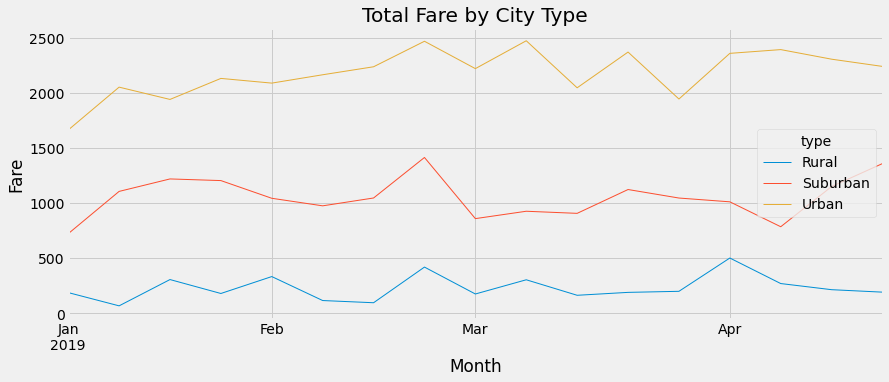

In [64]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pyber_week_data_df.plot(linewidth=1, figsize=(13, 5))
plt.xlabel('Month')
plt.ylabel('Fare')
plt.title("Total Fare by City Type")